# Joined and trimmed sequence
## Prefilter all the fastq files
- Filter criteria: discard reads that
  - has N in the sequence
  - shorter than 5 (include 5). As dada2 use a sliding window size = 5.

In [43]:
def get_joined_fastq_directories():
    import glob
    root = "/mnt/chen-nas/SequenceData/Evan/122018_AP1_BFO_kSeq/raw.reads/joined_files/"
    sampleList = [seq[seq.find('/R')+1:] for seq in glob.glob(root + "*") if not '@' in seq]
    sort_fn = lambda x: int(x[x.find('S')+1:])
    sampleList.sort(key=sort_fn)
    sampleDircList = [glob.glob(root + sample + '/' + sample + '.joined.fastq')[0] for sample in sampleList]
    return sampleList, sampleDircList

def filter_fastq_files(sample, dirc, outDirc):
    from Bio import SeqIO
    seqs = []
    with open(dirc, 'r') as handle:
        for total,record in enumerate(SeqIO.parse(handle, format='fastq')):
            if (not "N" in record.seq)and(len(record.seq)==21):
                seqs.append(record)
    print("Sample {}:    Input reads: {}; Output reads: {}; Passing rate: {:,.4f}".format(sample, total, len(seqs), len(seqs)/total))
    with open(outDirc, 'w') as outputHandle:
        SeqIO.write(seqs, outputHandle, "fastq")
        
sampleList, sampleDircList = get_joined_fastq_directories()
for ix in range(len(sampleList)):
    filter_fastq_files(sampleList[ix], sampleDircList[ix], "/mnt/storage/projects/k-seq/working/dada2/strict_21/{}.joined.filtered.fastq".format(sampleList[ix]))

Sample R4A-inputA_S1:    Input reads: 2165969; Output reads: 1972625; Passing rate: 0.9107
Sample RFA-1250A_S2:    Input reads: 2006577; Output reads: 1887026; Passing rate: 0.9404
Sample R4A-250A_S3:    Input reads: 1845899; Output reads: 1721820; Passing rate: 0.9328
Sample R4A-50A_S4:    Input reads: 2617259; Output reads: 2407377; Passing rate: 0.9198
Sample R4A-10A_S5:    Input reads: 1515551; Output reads: 1392173; Passing rate: 0.9186
Sample R4A-2A_S6:    Input reads: 1580502; Output reads: 1449941; Passing rate: 0.9174
Sample R4A-0A_S7:    Input reads: 2948172; Output reads: 2782840; Passing rate: 0.9439
Sample R4A-inputB_S8:    Input reads: 1257099; Output reads: 1163240; Passing rate: 0.9253
Sample RFA-1250B_S9:    Input reads: 3451113; Output reads: 3261229; Passing rate: 0.9450
Sample R4A-250B_S10:    Input reads: 10273786; Output reads: 9651905; Passing rate: 0.9395
Sample R4A-50B_S11:    Input reads: 2544353; Output reads: 2324796; Passing rate: 0.9137
Sample R4A-10B_S12:

In [44]:
["/mnt/storage/projects/k-seq/working/dada2/strict_21/{}.joined.filtered.fastq".format(sampleList[ix]) for ix in range(28)]

['/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-inputA_S1.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/RFA-1250A_S2.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-250A_S3.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-50A_S4.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-10A_S5.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-2A_S6.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-0A_S7.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-inputB_S8.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/RFA-1250B_S9.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-250B_S10.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-50B_S11.joined.filtered.fastq',
 '/mnt/st

57

In [15]:
sampleList

['R4A-0A_S7_R1.fastq',
 'R4A-0A_S7_R2.fastq',
 'R4A-0B_S14_R1.fastq',
 'R4A-0B_S14_R2.fastq',
 'R4A-10A_S5_R1.fastq',
 'R4A-10A_S5_R2.fastq',
 'R4A-10B_S12_R1.fastq',
 'R4A-10B_S12_R2.fastq',
 'R4A-1250A_S2_R1.fastq',
 'R4A-1250A_S2_R2.fastq',
 'R4A-1250B_S9_R1.fastq',
 'R4A-1250B_S9_R2.fastq',
 'R4A-250A_S3_R1.fastq',
 'R4A-250A_S3_R2.fastq',
 'R4A-250B_S10_R1.fastq',
 'R4A-250B_S10_R2.fastq',
 'R4A-2A_S6_R1.fastq',
 'R4A-2A_S6_R2.fastq',
 'R4A-2B_S13_R1.fastq',
 'R4A-2B_S13_R2.fastq',
 'R4A-50A_S4_R1.fastq',
 'R4A-50A_S4_R2.fastq',
 'R4A-50B_S11_R1.fastq',
 'R4A-50B_S11_R2.fastq',
 'R4A-inputA_S1_R1.fastq',
 'R4A-inputA_S1_R2.fastq',
 'R4A-inputB_S8_R1.fastq',
 'R4A-inputB_S8_R2.fastq',
 'R4B-0A_S21_R1.fastq',
 'R4B-0A_S21_R2.fastq',
 'R4B-0B_S28_R1.fastq',
 'R4B-0B_S28_R2.fastq',
 'R4B-10A_S19_R1.fastq',
 'R4B-10A_S19_R2.fastq',
 'R4B-10B_S26_R1.fastq',
 'R4B-10B_S26_R2.fastq',
 'R4B-1250A_S16_R1.fastq',
 'R4B-1250A_S16_R2.fastq',
 'R4B-1250B_S23_R1.fastq',
 'R4B-1250B_S23_R2.fastq'

In [ ]:
from Bio import SeqIO
dirc = "/mnt/storage/projects/k-seq/working/dada2/{}.joined.filtered.fastq".format(sampleList[0])
seqs = []
with open(dirc, 'r') as handle:
    for total,record in enumerate(SeqIO.parse(handle, format='fastq')):
        

In [2]:
import sys
import numpy as np
# add package directory to the top of sys.path
if np.sum([dirc.find('k-seq') >= 0 for dirc in sys.path]) == 0:
    sys.path = ['/home/yuning/Work/k-seq/src/'] + sys.path

import util
import importlib
import data.bfo as data
importlib.reload(data) # refresh data module

<module 'data.bfo' from '/home/yuning/Work/k-seq/src/data/bfo.py'>

In [3]:
sample = data.Sample()
sample.import_count_file(dirc='/mnt/storage/projects/k-seq/input/bfo_counts/R4B-inputA_S15_counts.txt')

In [6]:
sample.seqs

{'AAAAACAAAAACAAAAACAAA': 692277,
 'CTACTTCAAACAATCGGTCTG': 531449,
 'ATTACCCTGGTCATCGAGTGA': 175288,
 'ATTACCCTGGTCATCGAGTGT': 122615,
 'CTCTTCAAACAATCGGTCTTC': 74298,
 'ATTCACCTAGGTCATCGGGTGT': 61337,
 'CCACACTTCAAGCAATCGGTC': 58220,
 'ATTCACCTAGGTCATCGGGTG': 58044,
 'CCGCTTCAAACAATCGGTTTG': 38274,
 'CACACTTCAAGCAATCGGTC': 24560,
 'ATTCACCTAGGTCATCGAGTGT': 17705,
 'ACCCACTTCAAACAATCGGTC': 17336,
 'CTGCTTCAAACAATCGGTGTG': 8838,
 'TACTTCAAACAATCGGTCTG': 7712,
 'ATTCACCTAGGTCATCGAGTGA': 7224,
 'CTACTTCAAACAATCGGTCTTC': 6428,
 'AAAAAACAAAAACAAAAACAAA': 6407,
 'AAAACAAAAACAAAAACAAA': 5888,
 'CTGTTTCAAACAATCGGTCTC': 5675,
 'ATTCACCTAGGTCATCGGGTGTT': 5355,
 'CCAGTCTTCAAACAATCGGTC': 4672,
 'CCACTTCAAACAATCGGTCTG': 3970,
 'AAAAACAAAAACAAAAAACAAA': 3882,
 'AAAAACAAAAAACAAAAACAAA': 3799,
 'AGCCCGCTTCAAACAATCGGT': 3680,
 'TCTTCAAACAATCGGTCTTC': 3612,
 'AAAAACAAAACAAAAACAAA': 3338,
 'CCGCTTCAAGCAATCGGTCGC': 2947,
 'CCAAACTTCAAACAATCGGTC': 2781,
 'AAAAACAAAAACAAAACAAA': 2731,
 'TTACCCTGGTCATCGAGTG

limit_output extension: Maximum message size of 10000 exceeded with 29761 characters

In [10]:
import Levenshtein
q = 0.00075

centerSeq = 'CTACTTCAAACAATCGGTCTG'

for seq,count in sample.seqs.items():
    dist = Levenshtein.distance(centerSeq, seq)
    if  (dist <= 2):
        errRate = (q/3)**dist * (1-q)**(21-dist)
        print(seq, count, count - sample.seqs[centerSeq]/((1-q)**21)*errRate)

CTACTTCAAACAATCGGTCTG 531449 0.0
CTGCTTCAAACAATCGGTGTG 8838 8837.96673455805
TACTTCAAACAATCGGTCTG 7712 7579.038028521391
CTACTTCAAACAATCGGTCTTC 6428 6427.966734558049
CCACTTCAAACAATCGGTCTG 3970 3837.038028521391
CTACTTCAAACAATCGGTCTC 1741 1608.038028521391
CCTACTTCAAACAATCGGTCTG 1191 1058.038028521391
CTCTTCAAACAATCGGTCTG 1008 875.038028521391
CCGCTTCAAACAATCGGTCTG 925 924.9667345580489
CTACTTCAAACAATCGGTTTG 769 636.038028521391
CTACTTCAAAACAATCGGTCTG 531 398.03802852139097
CTACTTCAAACAATCGGTCTGT 497 364.03802852139097
CTACTTCAAACAATCGGTC 377 376.96673455804887
CTCCTTCAAACAATCGGTCTG 352 219.038028521391
CTACTTCAAACAATCGGCCTG 313 180.038028521391
CTGTTTCAAACAATCGGTCTG 281 280.96673455804887
CTACCTTCAAACAATCGGTCTG 281 148.038028521391
CTGCTTCAAACAATCGGTCTG 276 143.038028521391
CACTTCAAACAATCGGTCTG 219 86.038028521391
TTACTTCAAACAATCGGTCTG 182 49.038028521391
CTACTTCGAACAATCGGTCTG 182 49.038028521391
CTACTTTAAACAATCGGTCTG 168 35.038028521391
CTACTTCAAACAATTGGTCTG 144 11.038028521390999
CT

limit_output extension: Maximum message size of 10000 exceeded with 16243 characters

In [97]:
Levenshtein.editops('AAAAACAAAAACAAAAACAAA', 'AAAACAAAAAACAAAAACAAA')

[('replace', 4, 4), ('replace', 5, 5)]

# Analyze spike-in peak from data count file
## input

In [112]:
class Sample:

    """
    This class defines and describe the samples from k-seq experiments
    """
    
    def __init__(self):
        pass

import sys
import numpy as np

def basic_info(countFileRoot):
    from os import listdir
    from os.path import isfile, join
    
    sampleList = [f for f in listdir(countFileRoot) if isfile(join(countFileRoot, f))]
    sort_fn = lambda s: (int(s.split('_')[1][1:]))
    sampleList.sort(key=sort_fn)
    return countFileRoot, sampleList

def load_sampleSet(root, sampleList, strictLen=False, sampleSetDirc=None):
    import util
    
    def decode_sample_info(sample):
        import re
        
        sample.label = sample.dirc[sample.dirc.rfind('/') + 1:sample.dirc.rfind('_counts')]
        regex = re.compile(r'S\d+')
        sample.id = int(regex.findall(sample.label)[0][1:])
        if 'Input' in sample.label or 'input' in sample.label:
            sample.sampleType = 'input'
            sample.batch = 0
            sample.seriesPoint = 0
        else:
            sample.sampleType = 'k-seq'
            regex = re.compile(r'-\d+[A,B]')
            sample.batch = regex.findall(sample.label)[0][-1]
            sample.seriesPoint = float(regex.findall(sample.label)[0][1:-1])
       
        return sample
        
    def import_count_file(sample):
        """
        :param dirc:
        :param sampleType:
        :return:
        """
        with open(sample.dirc, 'r') as file:
            sample.uniqueSeq = int([elem for elem in next(file).strip().split()][-1])
            sample.totalSeq = int([elem for elem in next(file).strip().split()][-1])
            next(file)
            sample.seqs = {}
            for line in file:
                seq = line.strip().split()
                sample.seqs[seq[0]] = int(seq[1])
        return sample

    def survey_ext_std(sample, strictLen=False, stdSeq='AAAAACAAAAACAAAAACAAA', maxDist=10):
        """
        This method will survey the spike in sequences in each sample
        :param stdSeq:
        :return:
        """
        import Levenshtein
        sample.stdCounts = np.array([0 for _ in range(maxDist+1)])
        for seq in sample.seqs.keys():
            dist = Levenshtein.distance(stdSeq, seq)
            if strictLen:
                if (dist <= maxDist)and(len(seq)==21):
                    sample.stdCounts[dist] += sample.seqs[seq]
            else:
                if dist <= maxDist:
                    sample.stdCounts[dist] += sample.seqs[seq]
        return sample

    if sampleSetDirc:
        sampleSet = util.load_pickle(sampleSetDirc)
    else:
        sampleSet = []
        for sample in sampleList:
            currentSample = Sample()
            currentSample.dirc = root + sample
            currentSample = decode_sample_info(currentSample)
            currentSample = import_count_file(currentSample)
            currentSample = survey_ext_std(currentSample, maxDist=16)
            sampleSet.append(currentSample)

    return sampleSet


countFileRoot, sampleList = basic_info(countFileRoot='/mnt/storage/projects/k-seq/input/bfo_counts/')

sampleSet = load_sampleSet(root=countFileRoot, strictLen=True, sampleList=sampleList)

In [122]:
import Levenshtein

stdPeakCutOff = 3
inputSeqSet = [seq for seq in sampleSet[0].seqs.keys() if Levenshtein.distance(seq, 'AAAAACAAAAACAAAAACAAA') <= stdPeakCutOff]
kSeqSeqSet = [[seq for seq in sampleSet[i+1].seqs.keys() if Levenshtein.distance(seq, 'AAAAACAAAAACAAAAACAAA') <= stdPeakCutOff] for i in range(len(sampleSet)-1)]
allDetectedSeq = inputSeqSet.copy()
for sample in kSeqSeqSet:
    allDetectedSeq += sample
allDetectedSeq = set(allDetectedSeq)

import pandas as pd
seqList = pd.DataFrame(index=allDetectedSeq)
for sample in sampleSet:
    for seq in sample.seqs:
        if seq in seqList.index:
            seqList.loc[seq, sample.label] = sample.seqs[seq]
            
seqList['k-seq_detected_times'] = np.sum(~np.isnan(seqList), axis=1)-1

seqList.sort_values(axis='index', by=['k-seq_detected_times', 'R4A-inputA_S1'], inplace=True, ascending=False)

In [123]:
seqListNorm = seqList/seqList.loc['AAAAACAAAAACAAAAACAAA',]*10**5
seqListNorm['k-seq_detected_times'] = seqListNorm['k-seq_detected_times']/10**5*27
seqListNorm['length'] = [len(seq) for seq in seqList.index] 
seqListNorm

,R4A-inputA_S1,R4A-1250A_S2,R4A-250A_S3,R4A-50A_S4,R4A-10A_S5,R4A-2A_S6,R4A-0A_S7,R4A-inputB_S8,R4A-1250B_S9,R4A-250B_S10,...,R4B-0A_S21,R4B-inputB_S22,R4B-1250B_S23,R4B-250B_S24,R4B-50B_S25,R4B-10B_S26,R4B-2B_S27,R4B-0B_S28,k-seq_detected_times,length
AAAAACAAAAACAAAAACAAA,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,27.0,21
AAAAAACAAAAACAAAAACAAA,864.378353,929.935100,912.507979,959.157840,970.283927,917.496542,991.723221,865.983663,913.271585,873.353003,...,1028.764122,920.580606,963.132037,874.920242,923.827558,951.323171,941.282355,1028.053802,27.0,22
AAAACAAAAACAAAAACAAA,821.374455,761.567903,759.635312,790.688583,893.587584,919.794304,994.419240,796.068116,752.219283,741.208807,...,1029.377644,920.580606,805.853893,774.135231,812.898921,885.072627,926.192994,1023.834493,27.0,20
AAAAACAAAAAACAAAAACAAA,532.742409,534.141670,504.322199,529.142389,504.992782,543.191041,564.591381,563.131663,528.846743,512.319043,...,590.542398,549.699211,538.677645,522.051857,558.759679,567.892735,553.499129,602.517316,27.0,22
AAAAACAAAAACAAAAAACAAA,524.647558,529.899861,527.174298,504.709693,534.769009,561.343364,557.664109,537.865153,529.196857,515.842888,...,579.722108,532.038192,564.235343,522.293548,522.361220,555.768452,542.015191,601.366596,27.0,22
AAAAACAAAACAAAAACAAA,463.177280,438.537816,472.802061,463.755841,511.008181,541.582607,580.018603,450.643777,441.668432,438.798817,...,596.119866,518.350902,457.875998,456.795375,477.729776,502.291706,529.997116,568.302557,27.0,20
AAAAACAAAAACAAAACAAA,373.627986,364.143008,370.755616,382.546213,409.648701,452.199648,477.569868,375.536481,369.369953,363.676844,...,494.665709,399.801314,363.115916,350.451478,377.200699,417.421728,451.612559,476.781910,27.0,20
AAAAAAACAAAAACAAAAACAAA,163.414813,142.590049,144.992632,156.136562,159.408085,155.788293,168.838210,154.714108,155.975653,144.717916,...,184.893091,182.350019,171.236580,153.231888,156.860026,166.925390,170.923736,197.770517,27.0,23
AAAAACAAAAACAAAAACAA,136.600618,140.305998,165.874723,160.325025,166.325794,193.471597,206.395257,125.294199,142.146162,143.036081,...,210.437898,156.520779,153.346191,143.805951,170.292791,187.709875,209.248042,240.193751,27.0,20
CAAAAACAAAAACAAAAACAAA,95.367468,79.941789,81.952357,77.253858,85.117902,76.285713,82.303479,99.335456,68.097115,72.559177,...,91.024291,87.201280,78.245877,70.573677,81.896533,82.921432,77.449818,95.509811,27.0,22


limit_output extension: Maximum message size of 10000 exceeded with 32276 characters

In [124]:
seqListNorm.to_csv('/mnt/chen-nas/Users/Yuning/spike-in_peak.csv')

2406

In [149]:
Levenshtein.editops('AAAAACAAAAACAAAAACAAA', 'AAAAAADAAAAACAAAAACAAA')

[('insert', 5, 5), ('replace', 5, 6)]

In [177]:
def get_edit_operations(seq1, seq2):
    import Levenshtein
    import numpy as np
    
    opMtx = np.zeros(shape=[4, 6])
    opMap = {
        'A': 0,
        'T': 1,
        'C': 2,
        'G': 3
    }
    for op in Levenshtein.editops(seq1, seq2):
        if op[0] == 'replace':
            opMtx[opMap[seq1[op[1]]], opMap[seq2[op[2]]]] += 1
        if op[0] == 'delete':
            opMtx[opMap[seq1[op[1]]], 4] += 1
        if op[0] == 'insert':
            opMtx[opMap[seq2[op[2]]], 5] += 1
    
    return opMtx

centerSeq = 'AAAAACAAAAACAAAAACAAA'
opMtx = np.zeros(shape=[4, 6])
for seq in seqListNorm.index:
    if 'N' not in seq:
        opMtx = opMtx + get_edit_operations(centerSeq, seq)*np.nanmean(seqListNorm.loc[seq,'R4A-inputA_S1':'R4B-0B_S28'])

In [181]:
np.sum(opMtx, axis=0)

array([ 118.77935828,  378.81809045,  283.5243636 ,  465.19928366,
       3016.74777254, 3297.575898  ])

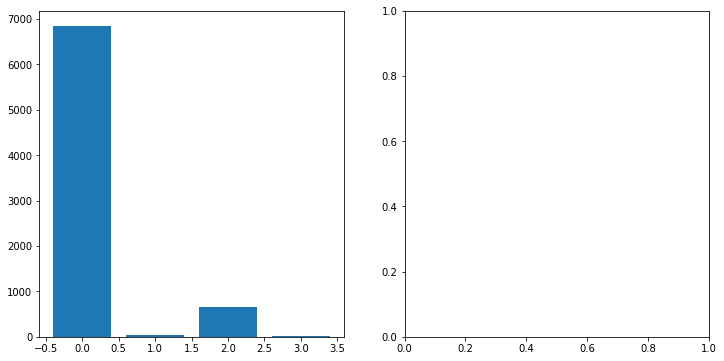

In [194]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 2, figsize=[12,6])
axes[0].bar(x= [0, 1, 2, 3], height = np.sum(opMtx, axis=1))
plt.show()

# Error correction results from Ramon's code

In [ ]:
root = ''

# Raw sequences
## Prefilter and create a test sample

In [35]:
import os
import glob
import Bio.SeqIO as SeqIO
import Levenshtein

def filterFn(record, trim=False):
    cond1 = 'N' not in record.seq
    cond2 = 65 <= len(record.seq) <= 76
    if trim:
        cond3 = record.seq[15:30].find('ACTATA')
        if cond1 and cond2 and cond3 > 0:
            return record[cond3 + len('ACTATA'):]
        else:
            return None
    else:
        if cond1 and cond2:
            return record
        else:
            return None

def filter_trim_fastq_files(dirc, outDirc, filterFn=None):
    from Bio import SeqIO
    import os
    if not filterFn:
        filterFn = lambda record: 'N' not in record.seq
    
    seqFiltered = []
    if 'R1' in dirc:
        trim=True
    else:
        trim=False
    with open(dirc, 'r') as handle:
        for total,record in enumerate(SeqIO.parse(handle, format='fastq')):
            res = filterFn(record, trim=trim)
            if res:
                seqFiltered.append(res)
    print("Sample {}: Input reads: {}; Trim:{}; Output reads: {}; Passing rate: {:,.4f}".format(dirc[dirc.rfind('/')+1:], total, trim, len(seqFiltered), len(seqFiltered)/total))
    with open(outDirc, 'w') as outputHandle:
        SeqIO.write(seqFiltered, outputHandle, "fastq")
    
inputDirc = "/mnt/storage/projects/k-seq/input/bfo_counts/raw_reads_pooled/"
outputDirc = "/mnt/storage/projects/k-seq/working/dada2_raw/filtered_testSamples/"
if not os.path.exists(outputDirc):
    os.makedirs(outputDirc)

sampleList = [file[file.find('/R')+1:] for file in glob.glob(inputDirc + "*input*")]
sampleList.sort(reverse=False)

for sample in sampleList:
    filter_trim_fastq_files(dirc = inputDirc + sample, outDirc = outputDirc + sample[:-6] + '_filtered.fastq', filterFn = filterFn)

Sample R4A-inputA_S1_R1.fastq: Input reads: 3061637; Trim:True; Output reads: 3045585; Passing rate: 0.9948
Sample R4A-inputA_S1_R2.fastq: Input reads: 3061637; Trim:False; Output reads: 3060402; Passing rate: 0.9996
Sample R4A-inputB_S8_R1.fastq: Input reads: 1759493; Trim:True; Output reads: 1749311; Passing rate: 0.9942
Sample R4A-inputB_S8_R2.fastq: Input reads: 1759493; Trim:False; Output reads: 1758790; Passing rate: 0.9996
Sample R4B-inputA_S15_R1.fastq: Input reads: 2672600; Trim:True; Output reads: 2656492; Passing rate: 0.9940
Sample R4B-inputA_S15_R2.fastq: Input reads: 2672600; Trim:False; Output reads: 2671516; Passing rate: 0.9996
Sample R4B-inputB_S22_R1.fastq: Input reads: 2457002; Trim:True; Output reads: 2441914; Passing rate: 0.9939
Sample R4B-inputB_S22_R2.fastq: Input reads: 2457002; Trim:False; Output reads: 2456030; Passing rate: 0.9996


## test 4 different trimming method

In [13]:
import Bio.SeqIO as SeqIO

for sample in sampleList:
    with open(inputDirc + sample, 'r') as fastqFile:
        counter = [1 if record.seq[6:6+19] == 'GATAATACGACTCACTATA' else 0 for record in SeqIO.parse(fastqFile, format='fastq')]
    print("Sample {}: Input reads: {}; Reads with primer: {}; Rate: {:,.4f}".format(sample, len(counter), sum(counter), sum(counter)/len(counter)))

Sample R4A-inputA_S1_R1.fastq: Input reads: 3061638; Reads with primer: 2990566; Rate: 0.9768
Sample R4A-inputA_S1_R2.fastq: Input reads: 3061638; Reads with primer: 4332; Rate: 0.0014
Sample R4A-inputB_S8_R1.fastq: Input reads: 1759494; Reads with primer: 1716013; Rate: 0.9753
Sample R4A-inputB_S8_R2.fastq: Input reads: 1759494; Reads with primer: 3034; Rate: 0.0017
Sample R4B-inputA_S15_R1.fastq: Input reads: 2672601; Reads with primer: 2608341; Rate: 0.9760
Sample R4B-inputA_S15_R2.fastq: Input reads: 2672601; Reads with primer: 5845; Rate: 0.0022
Sample R4B-inputB_S22_R1.fastq: Input reads: 2457003; Reads with primer: 2397085; Rate: 0.9756
Sample R4B-inputB_S22_R2.fastq: Input reads: 2457003; Reads with primer: 5475; Rate: 0.0022


In [14]:
import Bio.SeqIO as SeqIO

for sample in sampleList:
    with open(inputDirc + sample, 'r') as fastqFile:
        counter = [1 if record.seq.find('GATAATACGACTCACTATA')>0 else 0 for record in SeqIO.parse(fastqFile, format='fastq')]
    print("Sample {}: Input reads: {}; Reads with primer: {}; Rate: {:,.4f}".format(sample, len(counter), sum(counter), sum(counter)/len(counter)))

Sample R4A-inputA_S1_R1.fastq: Input reads: 3061638; Reads with primer: 3010411; Rate: 0.9833
Sample R4A-inputA_S1_R2.fastq: Input reads: 3061638; Reads with primer: 4357; Rate: 0.0014
Sample R4A-inputB_S8_R1.fastq: Input reads: 1759494; Reads with primer: 1727350; Rate: 0.9817
Sample R4A-inputB_S8_R2.fastq: Input reads: 1759494; Reads with primer: 3048; Rate: 0.0017
Sample R4B-inputA_S15_R1.fastq: Input reads: 2672601; Reads with primer: 2625602; Rate: 0.9824
Sample R4B-inputA_S15_R2.fastq: Input reads: 2672601; Reads with primer: 5887; Rate: 0.0022
Sample R4B-inputB_S22_R1.fastq: Input reads: 2457003; Reads with primer: 2412998; Rate: 0.9821
Sample R4B-inputB_S22_R2.fastq: Input reads: 2457003; Reads with primer: 5499; Rate: 0.0022


In [15]:
import Bio.SeqIO as SeqIO

for sample in sampleList:
    with open(inputDirc + sample, 'r') as fastqFile:
        counter = [1 if record.seq[15:30].find('ACTATA')>0 else 0 for record in SeqIO.parse(fastqFile, format='fastq')]
    print("Sample {}: Input reads: {}; Reads with primer: {}; Rate: {:,.4f}".format(sample, len(counter), sum(counter), sum(counter)/len(counter)))

Sample R4A-inputA_S1_R1.fastq: Input reads: 3061638; Reads with primer: 3046041; Rate: 0.9949
Sample R4A-inputA_S1_R2.fastq: Input reads: 3061638; Reads with primer: 4448; Rate: 0.0015
Sample R4A-inputB_S8_R1.fastq: Input reads: 1759494; Reads with primer: 1749589; Rate: 0.9944
Sample R4A-inputB_S8_R2.fastq: Input reads: 1759494; Reads with primer: 3107; Rate: 0.0018
Sample R4B-inputA_S15_R1.fastq: Input reads: 2672601; Reads with primer: 2656915; Rate: 0.9941
Sample R4B-inputA_S15_R2.fastq: Input reads: 2672601; Reads with primer: 5997; Rate: 0.0022
Sample R4B-inputB_S22_R1.fastq: Input reads: 2457003; Reads with primer: 2442297; Rate: 0.9940
Sample R4B-inputB_S22_R2.fastq: Input reads: 2457003; Reads with primer: 5629; Rate: 0.0023


In [18]:
import Bio.SeqIO as SeqIO

for sample in sampleList:
    with open(inputDirc + sample, 'r') as fastqFile:
        counter = [1 if Levenshtein.distance(str(record.seq[6:6+19]),'GATAATACGACTCACTATA')<=3 else 0 for record in SeqIO.parse(fastqFile, format='fastq')]
    print("Sample {}: Input reads: {}; Reads with primer: {}; Rate: {:,.4f}".format(sample, len(counter), sum(counter), sum(counter)/len(counter)))

Sample R4A-inputA_S1_R1.fastq: Input reads: 3061638; Reads with primer: 3052374; Rate: 0.9970
Sample R4A-inputA_S1_R2.fastq: Input reads: 3061638; Reads with primer: 4438; Rate: 0.0014
Sample R4A-inputB_S8_R1.fastq: Input reads: 1759494; Reads with primer: 1753513; Rate: 0.9966
Sample R4A-inputB_S8_R2.fastq: Input reads: 1759494; Reads with primer: 3102; Rate: 0.0018
Sample R4B-inputA_S15_R1.fastq: Input reads: 2672601; Reads with primer: 2662627; Rate: 0.9963
Sample R4B-inputA_S15_R2.fastq: Input reads: 2672601; Reads with primer: 5993; Rate: 0.0022
Sample R4B-inputB_S22_R1.fastq: Input reads: 2457003; Reads with primer: 2447765; Rate: 0.9962
Sample R4B-inputB_S22_R2.fastq: Input reads: 2457003; Reads with primer: 5615; Rate: 0.0023


## check read length

In [40]:
import numpy as np

dirc = "/mnt/storage/projects/k-seq/working/dada2_raw/filtered_testSamples/"
sampleList = [file[file.find('/R')+1:] for file in glob.glob(dirc + '*')]
sampleList.sort(reverse=False)
for sample in sampleList:
    with open(dirc + sample, 'r') as fastqFile:
        counter = [len(record) for record in SeqIO.parse(fastqFile, format='fastq')]
        print(sample)
        print("Mean:{}; 2.5:{}; 50:{}; 97.5:{}".format(np.mean(counter), np.percentile(counter, 2.5), np.percentile(counter, 50), np.percentile(counter, 97.5)))

R4A-inputA_S1_R1_filtered.fastq
Mean:65.90438323015118; 2.5:65.0; 50:66.0; 97.5:66.0
R4A-inputA_S1_R2_filtered.fastq
Mean:75.99873938129697; 2.5:76.0; 50:76.0; 97.5:76.0
R4A-inputB_S8_R1_filtered.fastq
Mean:65.91726914196504; 2.5:65.0; 50:66.0; 97.5:66.0
R4A-inputB_S8_R2_filtered.fastq
Mean:75.99876619721513; 2.5:76.0; 50:76.0; 97.5:76.0
R4B-inputA_S15_R1_filtered.fastq
Mean:65.90733907724925; 2.5:65.0; 50:66.0; 97.5:66.0
R4B-inputA_S15_R2_filtered.fastq
Mean:75.99810182682792; 2.5:76.0; 50:76.0; 97.5:76.0
R4B-inputB_S22_R1_filtered.fastq
Mean:65.89667695094913; 2.5:65.0; 50:66.0; 97.5:66.0
R4B-inputB_S22_R2_filtered.fastq
Mean:75.99806679885832; 2.5:76.0; 50:76.0; 97.5:76.0


## Pair and sort reads
per dada2 requirement, all forward and reverse reads should be paired and aligned sorted

In [16]:
import glob
import Bio.SeqIO as SeqIO

dirc = "/mnt/storage/projects/k-seq/working/dada2_raw/filtered_testSamples/"
sampleList = [file[file.find('/R')+1:file.find('_R')] for file in glob.glob(dirc + '*.fastq*')]
sampleList = list(set(sampleList))
sampleList.sort(reverse=False)

In [29]:
for sample in sampleList:
    print('checking sample {}...'.format(sample))
    with open(dirc + sample + '_R1_filtered.fastq', 'r') as fastqFile:
        seqIdF = [record.id for record in SeqIO.parse(fastqFile, format='fastq')]
    with open(dirc + sample + '_R2_filtered.fastq', 'r') as fastqFile:
        seqIdR = [record.id for record in SeqIO.parse(fastqFile, format='fastq')]
    commonSeq = set(seqIdF) & set(seqIdR)
    print("Forward reads:{}\nReverse reads:{}\nIntersection:{}".format(len(seqIdF), len(seqIdR), len(commonSeq)))
    print("If common reads are in the same order:{}".format([recId for recId in seqIdF if recId in commonSeq] == [recId for recId in seqIdR if recId in commonSeq]))

checking sample R4A-inputA_S1...
Forward reads:3045585
Reverse reads:3060402
Intersection:3044436
If common reads are in the same order:True
checking sample R4A-inputB_S8...
Forward reads:1749311
Reverse reads:1758790
Intersection:1748656
If common reads are in the same order:True
checking sample R4B-inputA_S15...
Forward reads:2656492
Reverse reads:2671516
Intersection:2655496
If common reads are in the same order:True
checking sample R4B-inputB_S22...
Forward reads:2441914
Reverse reads:2456030
Intersection:2441020
If common reads are in the same order:True


In [30]:
for sample in sampleList:
    print('checking sample {}...'.format(sample))
    with open(dirc + sample + '_R1_filtered.fastq', 'r') as fastqFile:
        seqIdF = [record.id for record in SeqIO.parse(fastqFile, format='fastq')]
    with open(dirc + sample + '_R2_filtered.fastq', 'r') as fastqFile:
        seqIdR = [record.id for record in SeqIO.parse(fastqFile, format='fastq')]
    commonSeq = set(seqIdF) & set(seqIdR)
    print("Sample {}:  forward reads:{}  reverse reads:{}  common reads:{}".format(sample, len(seqIdF), len(seqIdR), len(commonSeq)))
    seqFiltered = []
    with open(dirc + sample + '_R1_filtered.fastq', 'r') as fastqFile:
        seqFiltered = [record for record in SeqIO.parse(fastqFile, format='fastq') if record.id in commonSeq]
    with open(dirc + sample + '_R1_filtered_ordered.fastq', 'w') as outputHandle:
        SeqIO.write(seqFiltered, outputHandle, "fastq")
    with open(dirc + sample + '_R2_filtered.fastq', 'r') as fastqFile:
        seqFiltered = [record for record in SeqIO.parse(fastqFile, format='fastq') if record.id in commonSeq]
    with open(dirc + sample + '_R2_filtered_ordered.fastq', 'w') as outputHandle:
        SeqIO.write(seqFiltered, outputHandle, "fastq")

checking sample R4A-inputA_S1...
Sample R4A-inputA_S1:  forward reads:3045585  reverse reads:3060402  common reads:3044436
checking sample R4A-inputB_S8...
Sample R4A-inputB_S8:  forward reads:1749311  reverse reads:1758790  common reads:1748656
checking sample R4B-inputA_S15...
Sample R4B-inputA_S15:  forward reads:2656492  reverse reads:2671516  common reads:2655496
checking sample R4B-inputB_S22...
Sample R4B-inputB_S22:  forward reads:2441914  reverse reads:2456030  common reads:2441020


In [22]:
commonSeq = set(seqIdF) & set(seqIdR)
seqIdF_cleaned = 
seqIdR_cleaned = [recId for recId in seqIdR if recId in commonSeq]

NS500585:231:H7KNKAFXY:1:11101:8729:1112
NS500585:231:H7KNKAFXY:1:11101:10015:9527
